In [1]:
cd

/Users/keith_tetrad


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from bioservices import QuickGO
quickgo = QuickGO()

In [3]:
import matplotlib.pyplot as plt

In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('expand_frame_repr', False)


In [19]:
elife_data = pd.DataFrame(pd.read_csv('kw_dms/nevan_analysis/elife-38795-fig2-data1-v2.csv'))

In [20]:
elife_data

,GeneSymbol,log2FoldChange_XBP1s37/basal37,pvalue_XBP1s37/basal37,-log10_pvalue_XBP1s37/basal37,padj_XBP1s37/basal37,log2FoldChange_ATF6fXBP1s37/basal37,pvalue_ATF6fXBP1s37/basal37,-log10_pvalue_ATF6fXBP1s37/basal37,padj_ATF6fXBP1s37/basal37,log2FoldChange_basal39/basal37,pvalue_basal39/basal37,-log10_pvalue_basal39/basal37,padj_basal39/basal37,log2FoldChange_XBP1s39/basal39,pvalue_XBP1s39/basal39,-log10_pvalue_XBP1s39/basal39,padj_XBP1s39/basal39,log2FoldChange_ATF6fXBP1s39/basal39,pvalue_ATF6fXBP1s39/basal39,-log10_pvalue_ATF6fXBP1s39/basal39,padj_ATF6fXBP1s39/basal39
0,MARC1,-0.020159,0.772722,0.111976595,0.899885,-0.168922,1.552885e-02,1.808860603,5.120234e-02,0.199238,0.002439,2.612832,0.025391,-0.025581,0.691877,0.159971308,0.908196,-0.110583,0.070073,1.154447042,0.192772
1,MARCH1,-0.702759,0.866044,0.06246019,1.000000,1.160090,7.780415e-01,0.108997249,1.000000e+00,-1.155059,0.781586,0.107023,1.000000,1.132472,0.785758,0.104711139,1.000000,-0.684044,0.869583,0.06068914,1.000000
2,MARC2,-0.206391,0.144836,0.83912476,0.352711,0.029265,8.288274e-01,0.081535892,8.975151e-01,0.265067,0.039502,1.403379,0.184284,-0.023715,0.849831,0.070667536,0.958276,0.032332,0.781725,0.106946003,0.891129
3,MARCH2,-0.424132,0.058103,1.235802528,0.189741,-0.458040,3.910361e-02,1.407783159,1.054201e-01,-0.164239,0.440661,0.355895,0.708285,-0.113686,0.599311,0.222347801,0.864087,-0.265316,0.202608,0.693342638,0.406846
4,MARCH3,-0.246604,0.100863,0.996267064,0.276167,-0.054205,7.065974e-01,0.150827967,8.137276e-01,0.047984,0.728236,0.137728,0.886746,0.079598,0.558042,0.253333451,0.844921,0.049375,0.696729,0.156936416,0.842343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19823,ZYG11A,-0.044930,0.657147,0.182337626,0.835966,0.006859,9.447580e-01,0.024679409,9.697557e-01,-0.097019,0.317355,0.498455,0.606143,-0.049992,0.611150,0.213852023,0.869374,0.073928,0.413359,0.383672961,0.636610
19824,ZYG11B,-0.243793,0.176315,0.753710294,0.400257,-0.566772,1.736995e-03,2.760201361,8.487893e-03,0.124013,0.487258,0.312241,0.741112,-0.268894,0.132536,0.877664728,0.439928,-0.251026,0.156937,0.804273572,0.344638
19825,ZYX,0.203801,0.083362,1.079034158,0.243746,0.639171,3.596010e-08,7.4441786,4.928550e-07,-0.131371,0.262611,0.580687,0.550336,0.099282,0.397301,0.400880664,0.742230,0.309544,0.006884,2.162137368,0.031356
19826,ZZEF1,0.162470,0.024031,1.619225915,0.101026,0.172926,1.541358e-02,1.812096405,5.089558e-02,0.039154,0.579151,0.237208,0.801875,0.118919,0.088540,1.052858739,0.348602,0.163456,0.014859,1.828005726,0.058487


In [5]:
apms_data = pd.DataFrame(pd.read_csv('kw_dms/nevan_analysis/1-s2.0-S0092867423009157-mmc3(1).csv', delimiter=','))

In [6]:
# Filter for rows where any of the specified columns is True
flag_apms_data = apms_data.loc[apms_data[['flag_SaintandMist_final', 'flag_Saint_final', 'flag_SaintandMistorNatureSaint_final']].any(axis=1)].reset_index(drop=True)

In [7]:
def go_term(go_id):
    # Define parameters
    taxon_id = "9606"  # Taxonomy ID for Homo sapiens
    go_id = go_id # GO term
    
    # Fetch annotations
    annotations = quickgo.Annotation(taxonId=taxon_id, goId=go_id)

    # Extract results
    results = annotations['results']

    # Extract gene products using 'symbol' key
    gene_products = [result['symbol'] for result in results if result.get('symbol')]

    # Extract gene products using 'symbol' key and add them to a list
    gene_products = [result['symbol'] for result in results if result.get('symbol')]

    # Convert the list to a set to remove duplicates, and then back to a list
    unique_gene_products = list(set(gene_products))
    
    return unique_gene_products

def go_term_mask(mask):

    # Create a boolean mask
    mask = flag_apms_data['PreyGene'].apply(lambda x: any(word in x for word in mask))
    
    return flag_apms_data[mask]

In [8]:
#ATP-dependent protein folding chaperone
GO_0140662 = go_term('GO:0140662')
ATP = go_term_mask(GO_0140662)

#protein folding in endoplasmic reticulum
GO_0034975 = go_term('GO:0034975')
ER = go_term_mask(GO_0034975)

#protein folding chaperone
GO_0044183 = go_term('GO:0044183')
all_chaps = go_term_mask(GO_0044183)

In [9]:
# Group by the 'ViralProtein' and aggregate unique values in 'PreyGene'
grouped = ATP.groupby('ViralProtein')['PreyGene'].unique()

# Group by both 'variant' and 'ViralProtein', then aggregate unique values in 'PreyGene'
grouped_byvariant = ER.groupby(['ViralProtein','Variant'])['PreyGene'].unique()

In [10]:
#extract a list of unique PreyGenes
unique_ER = ER['PreyGene'].unique()
unique_ATP = ATP['PreyGene'].unique()
unique_all_chaps = all_chaps['PreyGene'].unique()

# Combine and find unique values
combined_unique = np.concatenate((unique_ER, unique_ATP, unique_all_chaps))
unique_chaps = np.unique(combined_unique)

chunk_size = 10000  # Adjust based on your memory constraints
normal_tissue_data = pd.DataFrame()  # Initialize an empty DataFrame for the filtered data
rna_single_cell_data = pd.DataFrame()

for chunk in pd.read_csv('kw_dms/nevan_analysis/normal_tissue.tsv', sep='\t', chunksize=chunk_size):
    # Filter the chunk
    filtered_chunk = chunk[chunk['Gene name'].isin(unique_chaps)]
    # Append the filtered chunk to the DataFrame
    normal_tissue_data = pd.concat([normal_tissue_data, filtered_chunk])

for chunk in pd.read_csv('kw_dms/nevan_analysis/rna_single_cell_type.tsv', sep='\t', chunksize=chunk_size):
    # Filter the chunk
    filtered_chunk = chunk[chunk['Gene name'].isin(unique_chaps)]
    # Append the filtered chunk to the DataFrame
    rna_single_cell_data = pd.concat([rna_single_cell_data, filtered_chunk])
    

In [11]:
unique_tissue_cells = normal_tissue_data.groupby('Tissue')['Cell type'].unique()
unique_RNA_cells = rna_single_cell_data['Cell type'].unique()

# for tissue, cell_types in unique_tissue_cells.items():
#     print(f"{tissue}: {', '.join(cell_types)}")
#     print('\n')
    
# with open('tissue_cell_types.txt', 'w') as file:
#     for tissue, cell_types in unique_tissue_cells.items():
#         file.write(f"{tissue}: {', '.join(cell_types)}\n")
#         file.write('\n')  # This adds an empty line after each tissue


In [12]:
tissue_cell_types = {
    'bronchus': ['respiratory epithelial cells', 'basal cells', 'Basal respiratory cells', 'Ciliated cells', 'ciliated cells (cell body)', 'ciliated cells (cilia axoneme)', 'ciliated cells (ciliary rootlets)', 'ciliated cells (tip of cilia)', 'goblet cells'],
    'kidney': ['cells in tubules', 'collecting ducts'],
    'lung': ['alveolar cells type I', 'alveolar cells type II', 'endothelial cells', 'alveolar cells'],
    'pancreas': ['exocrine glandular cells', 'pancreatic endocrine cells'],
    'skin': ['Basal keratinocytes', 'Basal squamous epithelial cells']
}

# Filter for only tissue/cell type combinations
def filter_combinations(row):
    tissue = row['Tissue']
    cell_type = row['Cell type']
    return cell_type in tissue_cell_types.get(tissue, [])

# Filter the DataFrame
tissue_SARS_filtered = normal_tissue_data[normal_tissue_data.apply(filter_combinations, axis=1)].reset_index(drop=True)

# Aggregate all unique cell types from the dictionary
all_cell_types = set()
for cell_types in tissue_cell_types.values():
    all_cell_types.update(cell_types)

# Cleaning up cell type names (some of this may not be biologically correct)
replacements = {
    'Alveolar cells type 1': 'alveolar cells type I',
    'Alveolar cells type 2': 'alveolar cells type II',
    'Collecting duct cells': 'collecting ducts',
    'Endothelial cells': 'endothelial cells',
    'Exocrine glandular cells': 'exocrine glandular cells',
    'Pancreatic endocrine cells': 'pancreatic endocrine cells'
}
rna_single_cell_data['Cell type'] = rna_single_cell_data['Cell type'].replace(replacements)

# Filter rna_single_cell_data based on the cell types
rna_single_cell_SARS_filtered = rna_single_cell_data[rna_single_cell_data['Cell type'].isin(all_cell_types)].reset_index(drop=True)

In [42]:
unique_chaps_list = unique_chaps.tolist()

filtered_elife_data = elife_data[elife_data['GeneSymbol'].isin(unique_chaps_list)].copy()

filtered_elife_data = filtered_elife_data.replace('#NUM!', np.nan)

for column in filtered_elife_data.columns[1:]:
    # Check if the column's non-NaN values are not of float type
    if not pd.api.types.is_float_dtype(filtered_elife_data[column].dropna()):
        # Convert non-NaN values to float
        filtered_elife_data[column] = pd.to_numeric(filtered_elife_data[column], errors='coerce')


for column in filtered_elife_data.columns:
    max_value = filtered_elife_data[column].dropna().max()  # Ignore NaN for max calculation
    filtered_elife_data[column] = filtered_elife_data[column].fillna(max_value)


In [89]:
# Group by the 'ViralProtein' and aggregate unique values in 'PreyGene'
grouped = ER.groupby('ViralProtein')['PreyGene'].unique()

# Group by both 'variant' and 'ViralProtein', then aggregate unique values in 'PreyGene'
grouped_byvariant = ER.groupby(['ViralProtein','Variant'])['PreyGene'].unique()

grouped_byvariant

ViralProtein  Variant                       
E             beta                                                                                       [CANX]
              omicron                                                                                    [CANX]
M             delta                                                                                      [CANX]
              delta.1                                                                                    [CANX]
              omicron                                                                              [CANX, VAPA]
N             alpha                                                                                     [HSPA5]
              alpha_gamma_omicron                                                              [HSPA5, HSP90B1]
              beta                                                                       [HSPA5, HSP90B1, CANX]
              cal20c                                       

ERO1B


UPR activation RNAseq data:
XBP1s 37˚C vs. Basal 37˚C
log2 fold change: 1.951922596
-log10 pvalue: 33.66677373


ATF6f/XBP1s 37˚C vs. Basal 37˚C
log2 fold change: 1.985037015
-log10 pvalue: 34.85133324


protein immunohistochemistry data:
  Tissue                    Cell type  Level Reliability
bronchus respiratory epithelial cells Medium    Enhanced
  kidney             cells in tubules Medium    Enhanced
    lung               alveolar cells    Low    Enhanced
pancreas     exocrine glandular cells   High    Enhanced


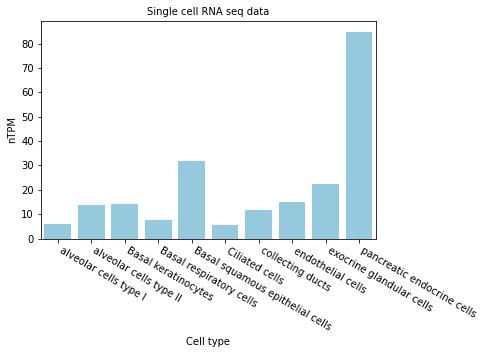

In [99]:
# Define the specific gene you are interested in
specific_gene = 'ERO1B'  # Replace with the actual gene identifier

# Filter the DataFrames for the specific gene
specific_gene_tissue = tissue_SARS_filtered.loc[tissue_SARS_filtered['Gene name'] == specific_gene, ['Tissue', 'Cell type', 'Level', 'Reliability']]
specific_gene_rna = rna_single_cell_SARS_filtered[rna_single_cell_SARS_filtered['Gene name'] == specific_gene]
specific_eLife_data = filtered_elife_data[filtered_elife_data['GeneSymbol'] == specific_gene]

# Print the results
print(specific_gene)
print('\n')
print('UPR activation RNAseq data:')
print('XBP1s 37˚C vs. Basal 37˚C')
print('log2 fold change:', specific_eLife_data.loc[specific_eLife_data['GeneSymbol'] == specific_gene, 'log2FoldChange_XBP1s37/basal37'].item())
print('-log10 pvalue:', specific_eLife_data.loc[specific_eLife_data['GeneSymbol'] == specific_gene, '-log10_pvalue_XBP1s37/basal37'].item())
print('\n')

print('ATF6f/XBP1s 37˚C vs. Basal 37˚C')
print('log2 fold change:', specific_eLife_data.loc[specific_eLife_data['GeneSymbol'] == specific_gene, 'log2FoldChange_ATF6fXBP1s37/basal37'].item())
print('-log10 pvalue:', specific_eLife_data.loc[specific_eLife_data['GeneSymbol'] == specific_gene, '-log10_pvalue_ATF6fXBP1s37/basal37'].item())
print('\n')

print('protein immunohistochemistry data:')
print(specific_gene_tissue.to_string(index=False))

# Create the barplot with a uniform color
sns.barplot(data=specific_gene_rna, x='Cell type', y='nTPM', color='skyblue')
plt.xticks(rotation=-30, ha='left')
plt.title('Single cell RNA seq data', fontsize=10)

plt.show()

In [102]:
# Create the interactive plot with Plotly
fig = px.scatter(filtered_elife_data, 
                 x='log2FoldChange_XBP1s37/basal37', 
                 y='-log10_pvalue_XBP1s37/basal37', 
                 color='GeneSymbol',
                 hover_data=['GeneSymbol'])

fig.update_layout(title={'text': 'XBP1s 37˚C vs. Basal 37˚C', 'x':0.5, 'xanchor': 'center'})

# Show the plot
fig.show()

# Create the interactive plot with Plotly
fig = px.scatter(filtered_elife_data, 
                 x='log2FoldChange_ATF6fXBP1s37/basal37', 
                 y='-log10_pvalue_ATF6fXBP1s37/basal37', 
                 color='GeneSymbol',
                 hover_data=['GeneSymbol'])

fig.update_layout(title={'text': 'ATF6f/XBP1s 37˚C vs. Basal 37˚C', 'x':0.5, 'xanchor': 'center'})

# Show the plot
fig.show()

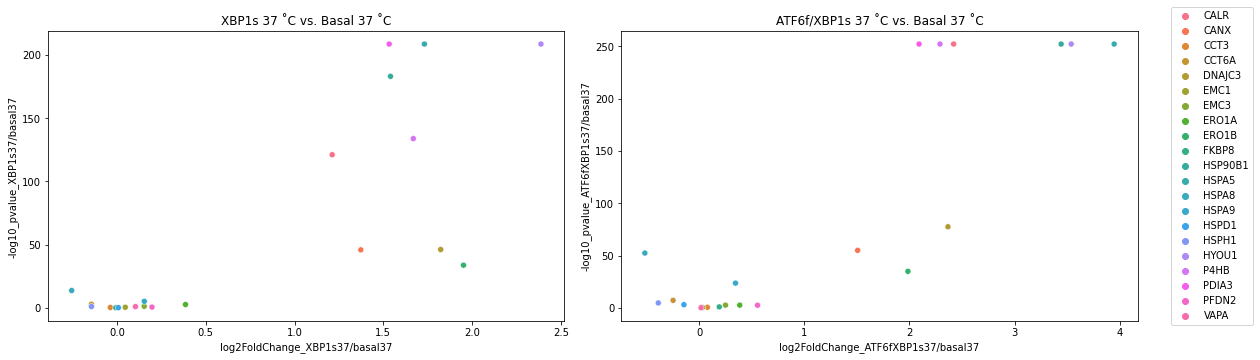

In [96]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# First scatter plot
scatter1 = sns.scatterplot(ax=axs[0], 
                           data=filtered_elife_data, 
                           x='log2FoldChange_XBP1s37/basal37', 
                           y='-log10_pvalue_XBP1s37/basal37', 
                           hue='GeneSymbol')

# Add title to the first subplot
axs[0].set_title("XBP1s 37 ˚C vs. Basal 37 ˚C")

# Remove the first plot's legend
scatter1.legend_.remove()

# Second scatter plot
scatter2 = sns.scatterplot(ax=axs[1], 
                           data=filtered_elife_data, 
                           x='log2FoldChange_ATF6fXBP1s37/basal37', 
                           y='-log10_pvalue_ATF6fXBP1s37/basal37', 
                           hue='GeneSymbol')

axs[1].set_title("ATF6f/XBP1s 37 ˚C vs. Basal 37 ˚C")

# Remove the second plot's legend
scatter2.legend_.remove()

# Get handles and labels from one of the plots for the shared legend
handles, labels = scatter1.get_legend_handles_labels()

# Create a shared legend for the figure
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.55), borderaxespad=0.)

# Adjust layout
plt.tight_layout()

plt.show()
